In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import time
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn. decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('data.csv')


# EDA

In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### no null values

In [7]:
df.duplicated().sum()

0

#### no duplicate values

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
fig= px.histogram(df, x='diagnosis',color='diagnosis', barmode='group')
fig.show()

In [10]:
fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

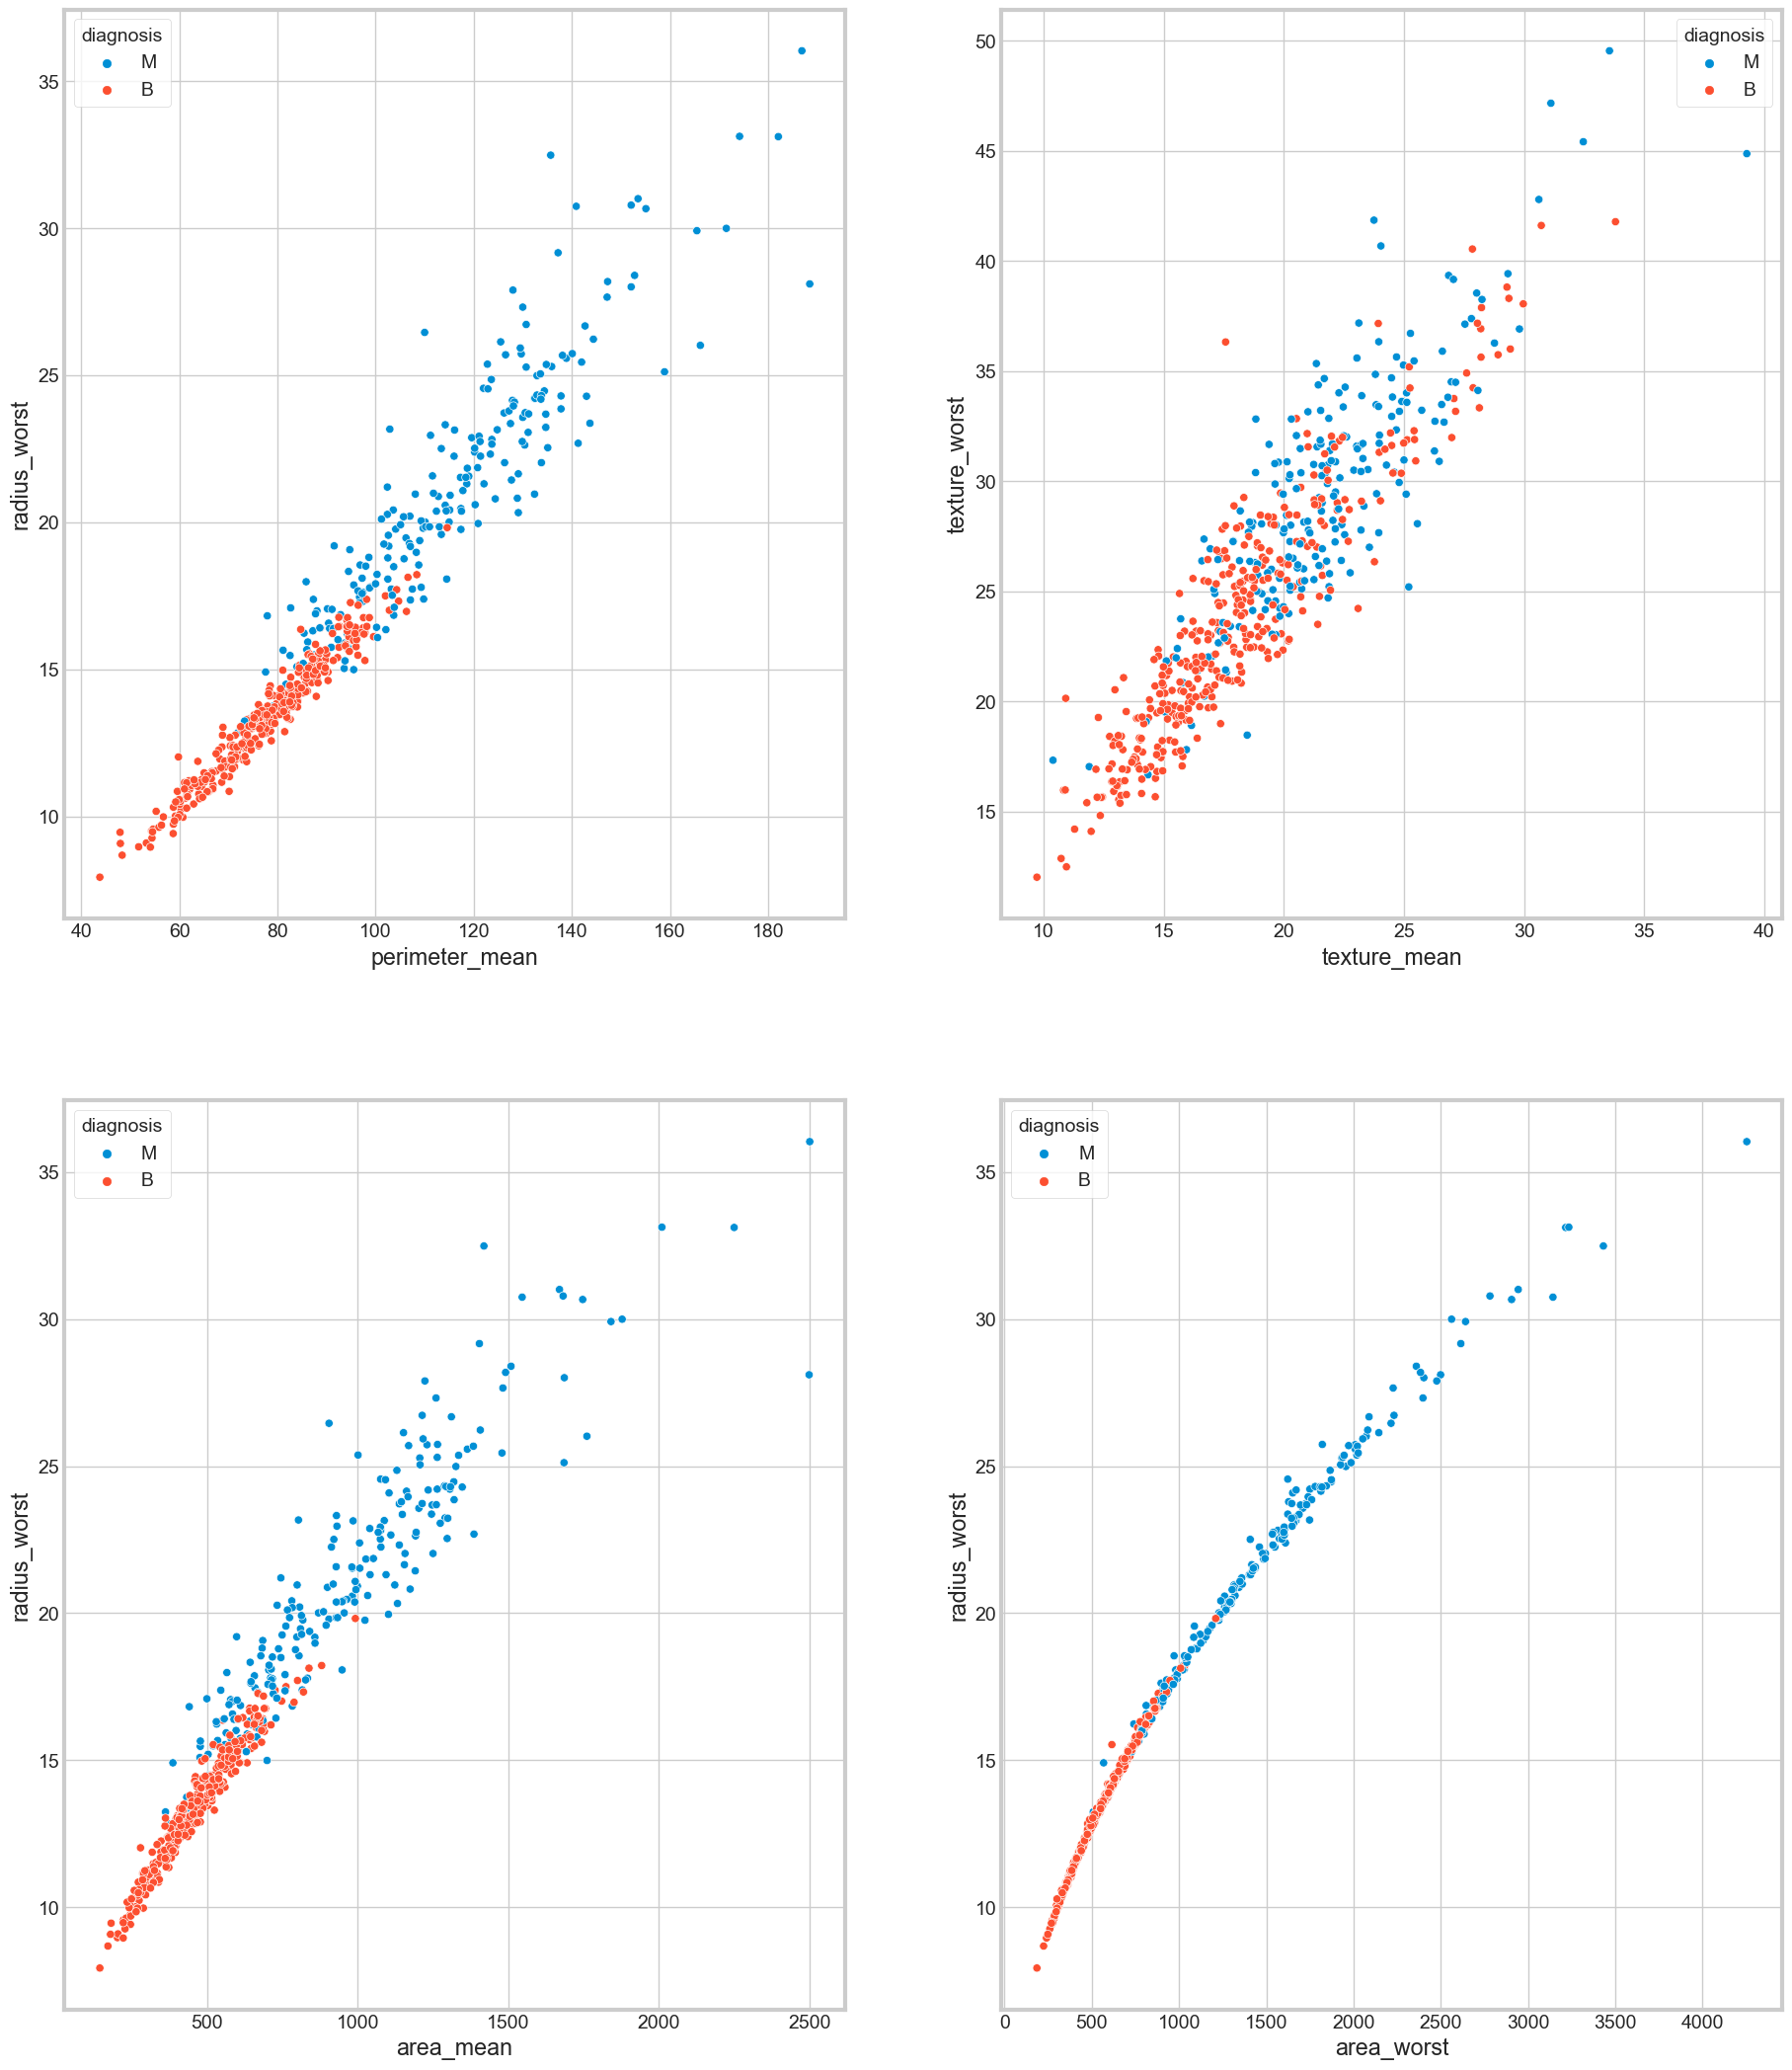

In [11]:
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_se'>

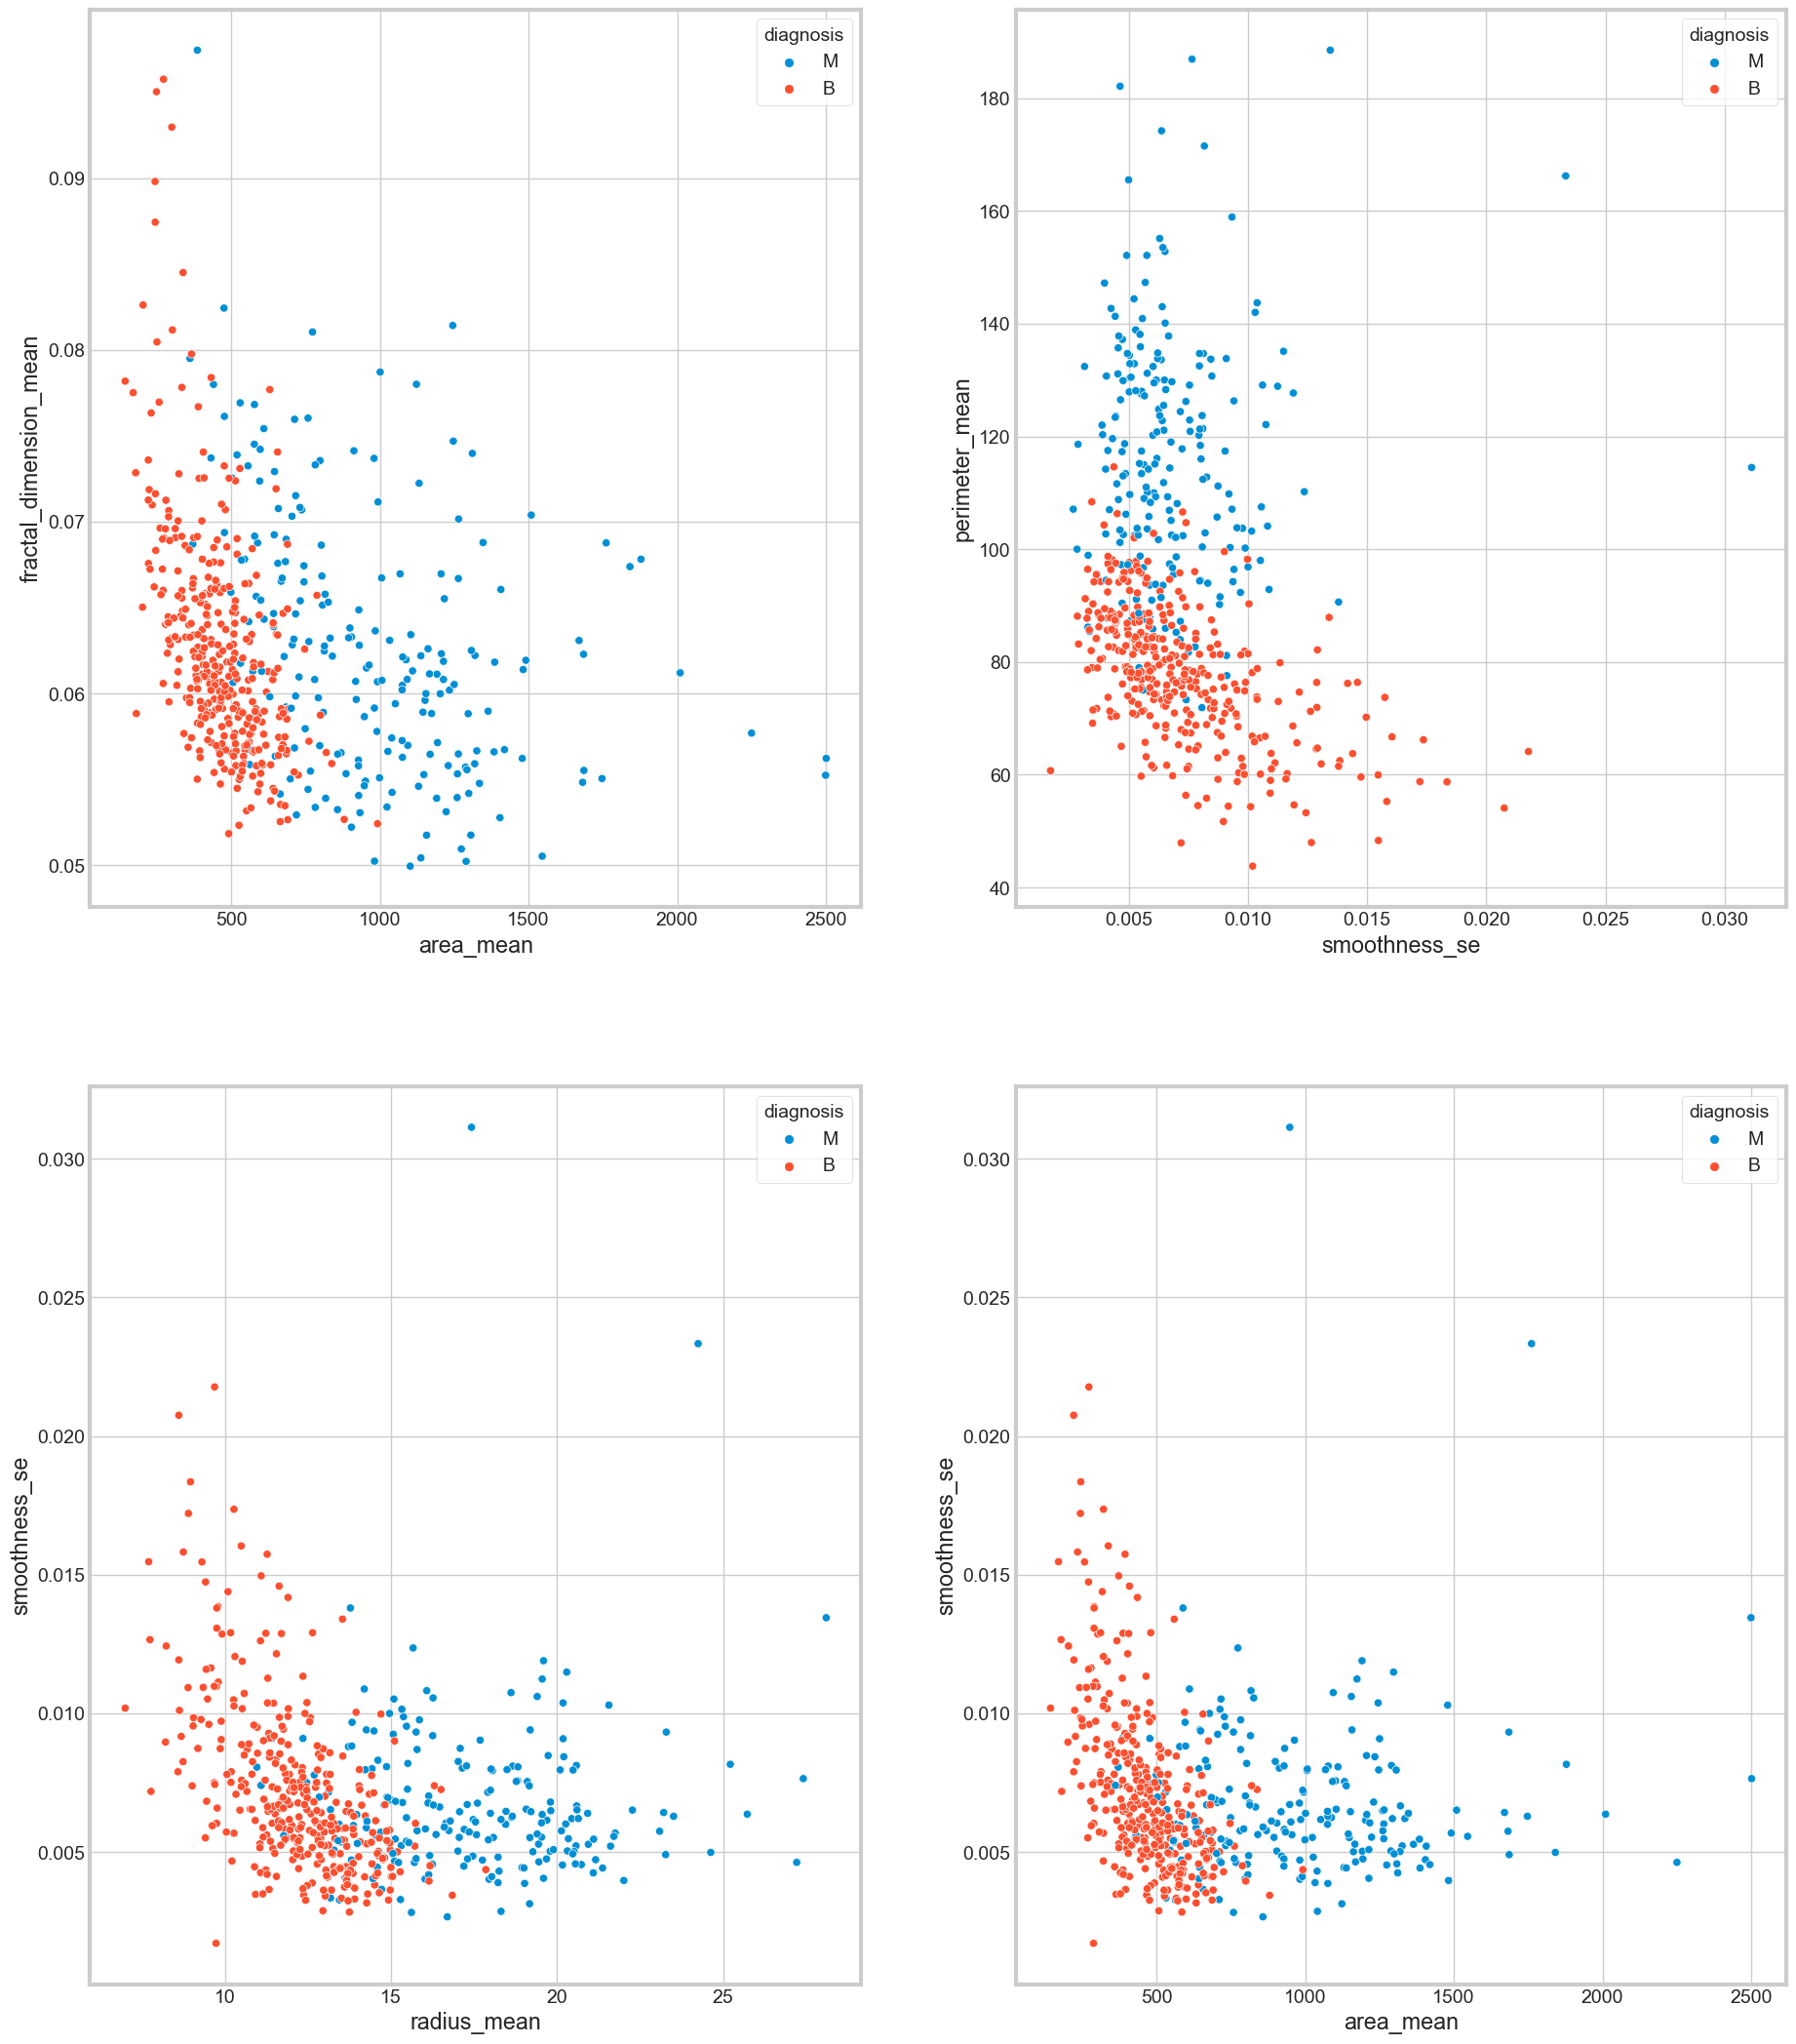

In [12]:
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])


In [13]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',size_max=60)
fig.show()


In [14]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',size_max=60)
fig2.show()

In [15]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

<AxesSubplot:>

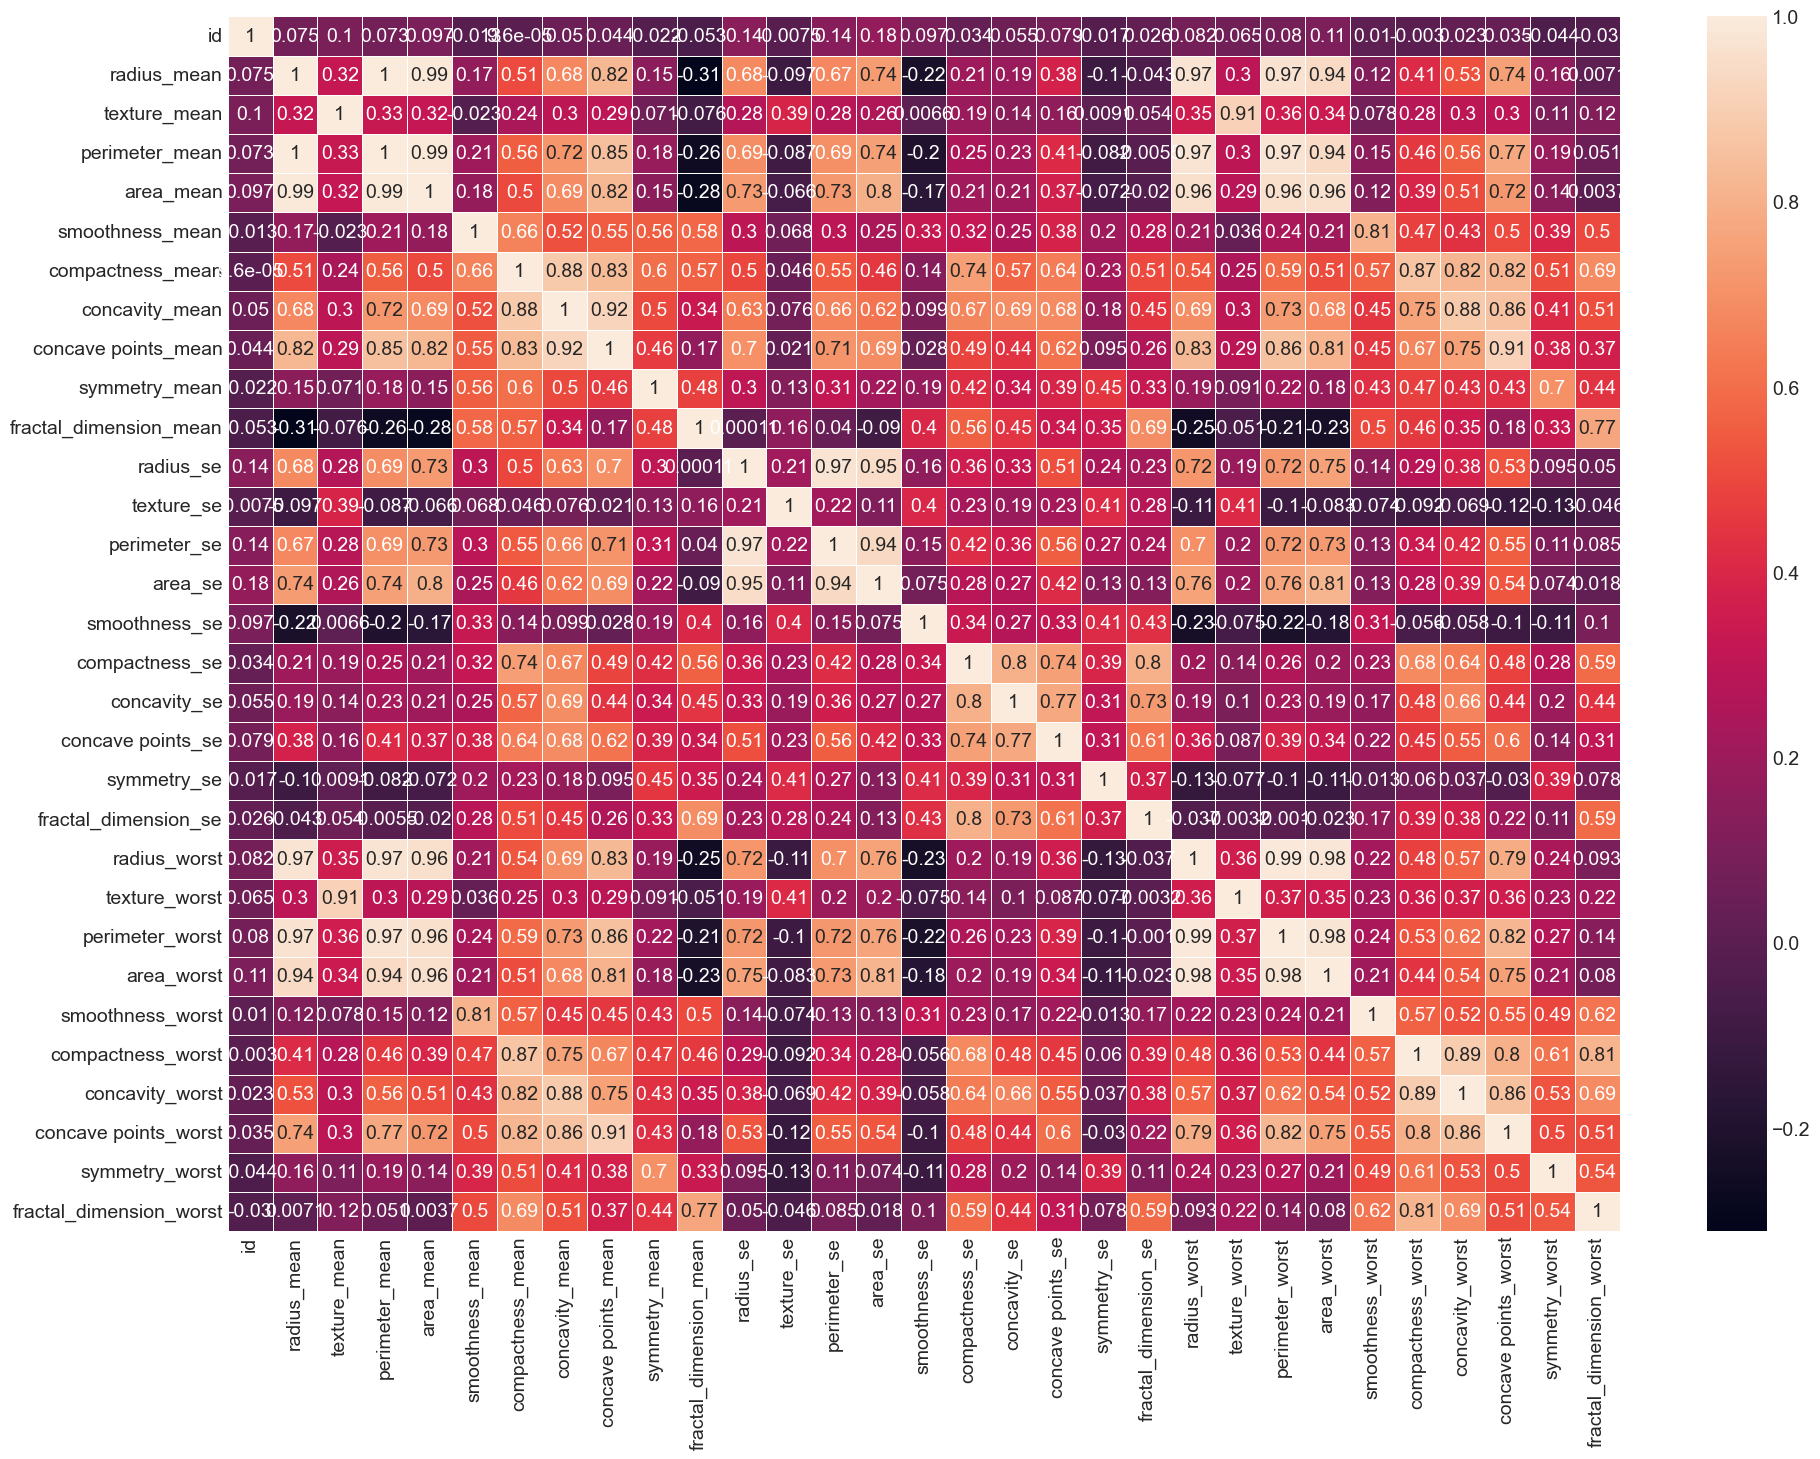

In [16]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

In [17]:
means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

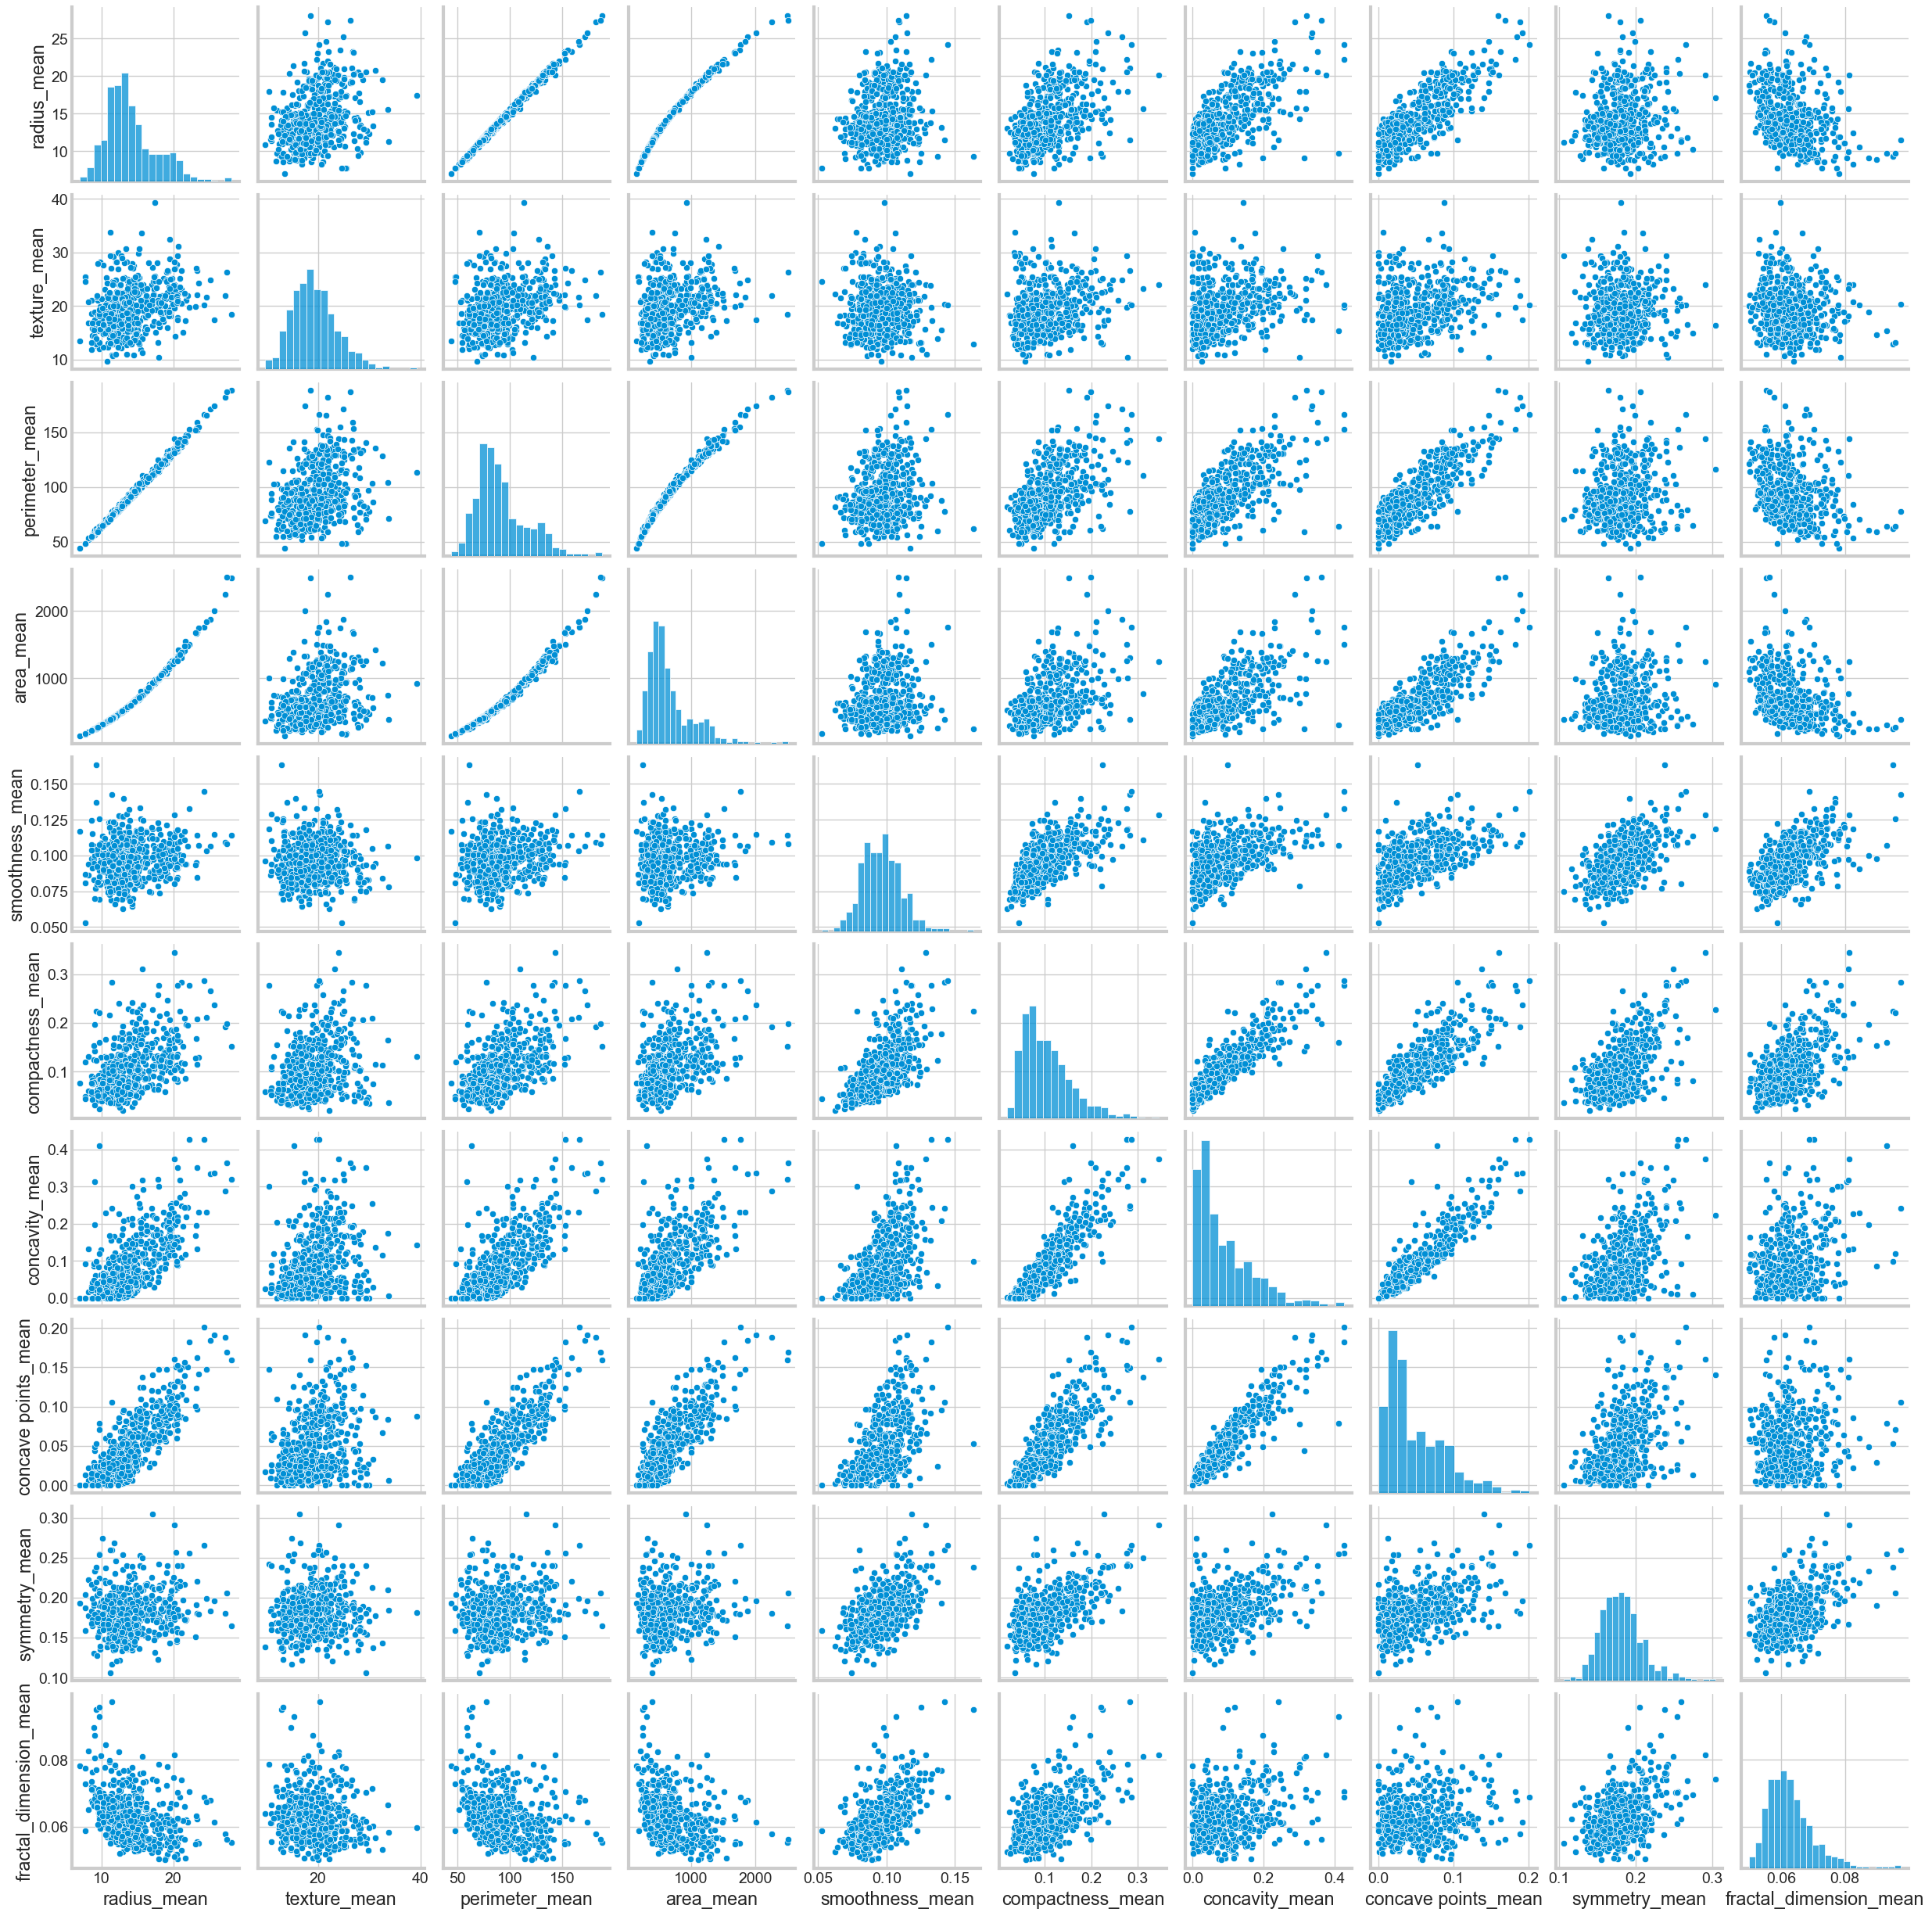

In [18]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[means]);

In [19]:
X = df.drop(["diagnosis"],axis=1)

In [20]:
y = df.diagnosis

In [21]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Using 5-fold cross-validation  

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


## Tree based feature selection and random forest classification

Accuracy is:  0.9649122807017544
Feature ranking:
1. feature 28 (0.120481)
2. feature 8 (0.113695)
3. feature 23 (0.103214)
4. feature 7 (0.088863)
5. feature 21 (0.084995)
6. feature 24 (0.081319)
7. feature 3 (0.065326)
8. feature 14 (0.056371)
9. feature 4 (0.038799)
10. feature 27 (0.038396)
11. feature 1 (0.025760)
12. feature 26 (0.019113)
13. feature 13 (0.018709)
14. feature 22 (0.016422)
15. feature 11 (0.014796)
16. feature 25 (0.014205)
17. feature 29 (0.012848)
18. feature 2 (0.012343)
19. feature 20 (0.008751)
20. feature 5 (0.007329)
21. feature 17 (0.006745)
22. feature 30 (0.006271)
23. feature 15 (0.006192)
24. feature 16 (0.005701)
25. feature 18 (0.005563)
26. feature 0 (0.005405)
27. feature 12 (0.005118)
28. feature 6 (0.004751)
29. feature 19 (0.004668)
30. feature 9 (0.004546)
31. feature 10 (0.003306)


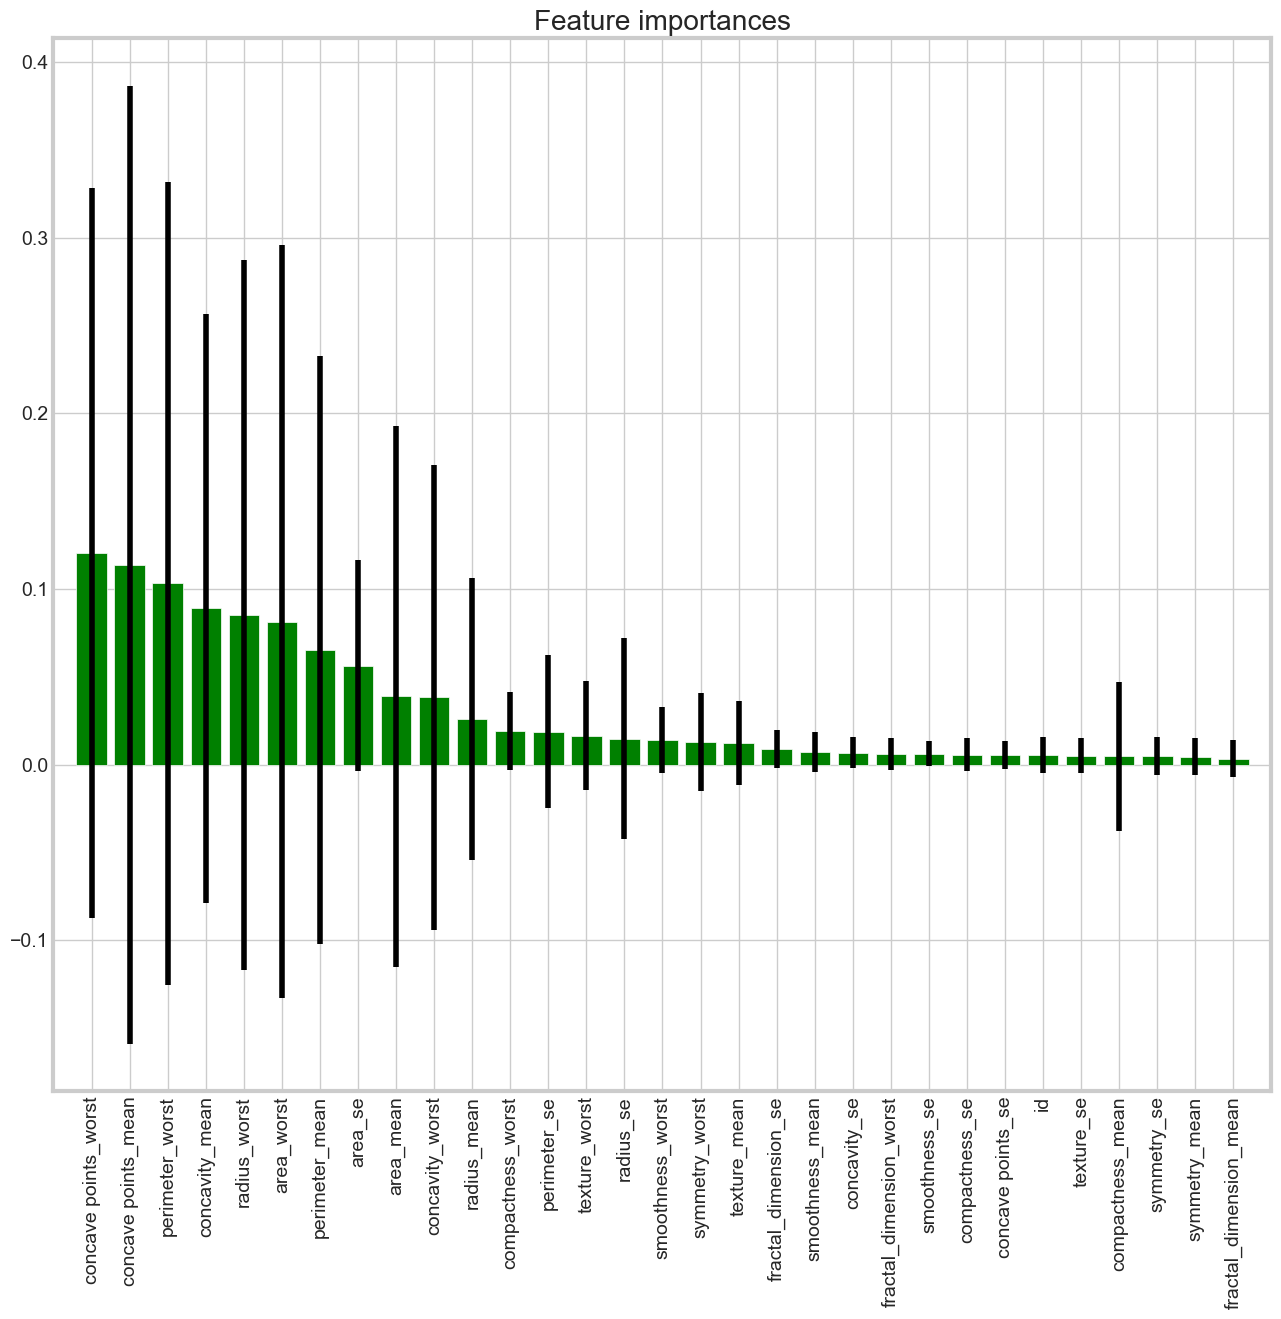

In [23]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


## PCA scatter plot with 3 components (72.7%)

In [24]:

target_pca = df['diagnosis']
data_pca = df.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [25]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [26]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [27]:
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = '#FFD700',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )



layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

### Accuracy is 96% , but the if we see the confusion matrix we make few wrong prediction

<AxesSubplot:>

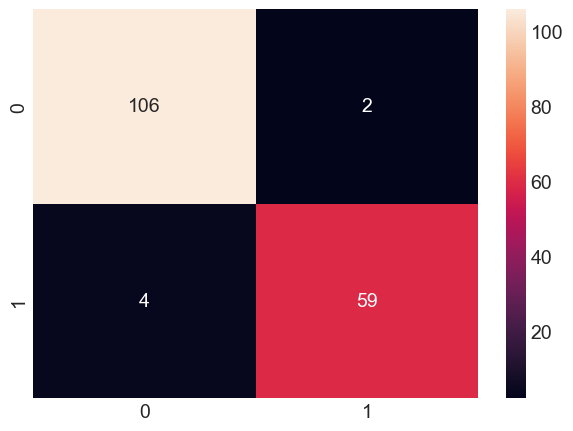

In [28]:
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

### Scaler

In [29]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scale = RobustScaler()
scaler = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### This function is to find how long it is taking to execute a process

In [30]:
from datetime import datetime as dt
def timer(start_time=None):
  if not start_time:
      start_time = dt.now()
      return start_time
  elif start_time:
      thour, temp_sec = divmod((dt.now() - start_time).total_seconds(), 3600)
      tmin, tsec = divmod(temp_sec, 60)
      print('\n Time taken: %i hours %i min and %s sec.' % (thour, tmin, round(tsec, 2)))

# Decision Tree

### Feature Extraction with PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
x_trans=pca.fit_transform(X_train)
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  31
No. of samples:  398
No. of components:  24
Explained variance ratio:  [9.05153013e-01 4.26887917e-02 1.91355828e-02 9.71183506e-03
 5.00590267e-03 4.38188245e-03 3.63435512e-03 2.51053620e-03
 1.44728289e-03 1.20679142e-03 1.03259012e-03 8.85038582e-04
 7.38961076e-04 6.25303808e-04 3.84581700e-04 3.25477193e-04
 2.53484127e-04 1.84238669e-04 1.61523069e-04 1.16827785e-04
 8.83862628e-05 8.32403295e-05 6.26084060e-05 5.79017592e-05]


### PCA to orient data better

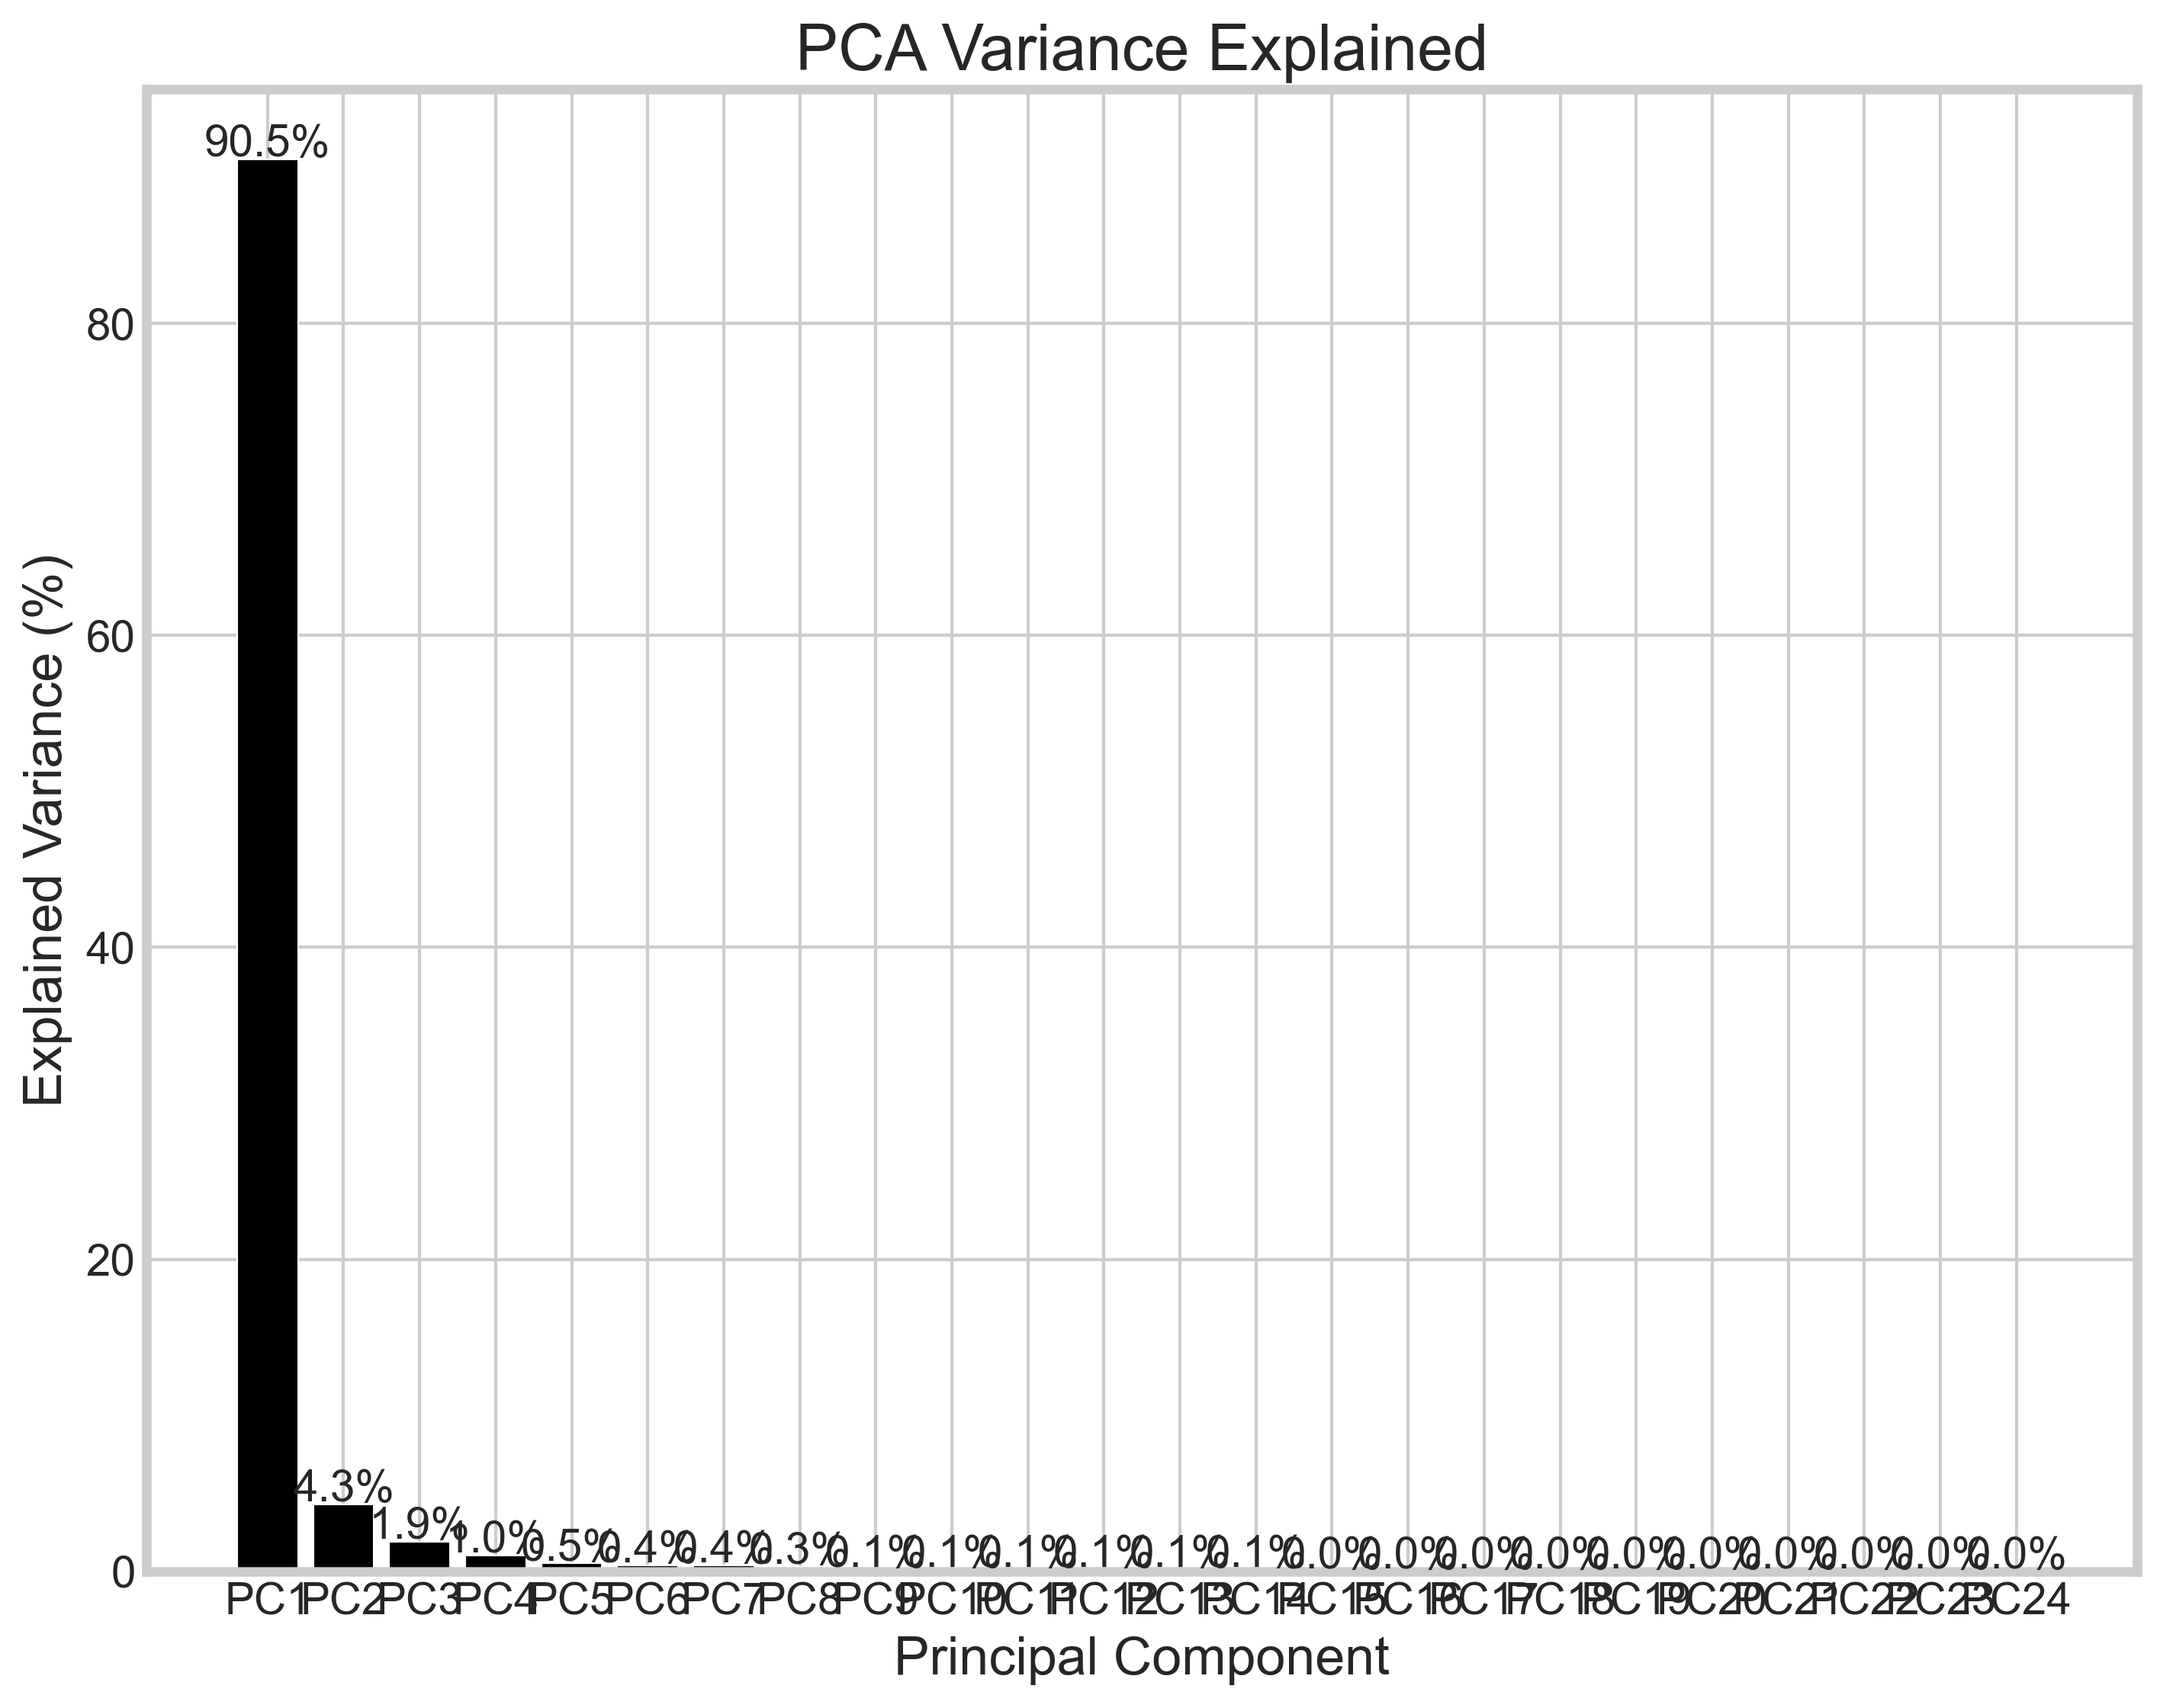

In [32]:
x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
clf = DecisionTreeClassifier(max_depth = 3,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
params_tree = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}
grid_search_tree = GridSearchCV(clf, params_tree, cv=10, scoring='recall')
grid_search_tree = grid_search_tree.fit(X_train, y_train)
print(f'The best parameters for Decision Tree are: "{grid_search_tree.best_params_}" and this model can explain the dataset with an accuracy of {str(np.round(grid_search_tree.best_score_ * 100,2))} %')

The best parameters for Decision Tree are: "{'criterion': 'gini', 'max_depth': 1, 'max_features': 3}" and this model can explain the dataset with an accuracy of nan %


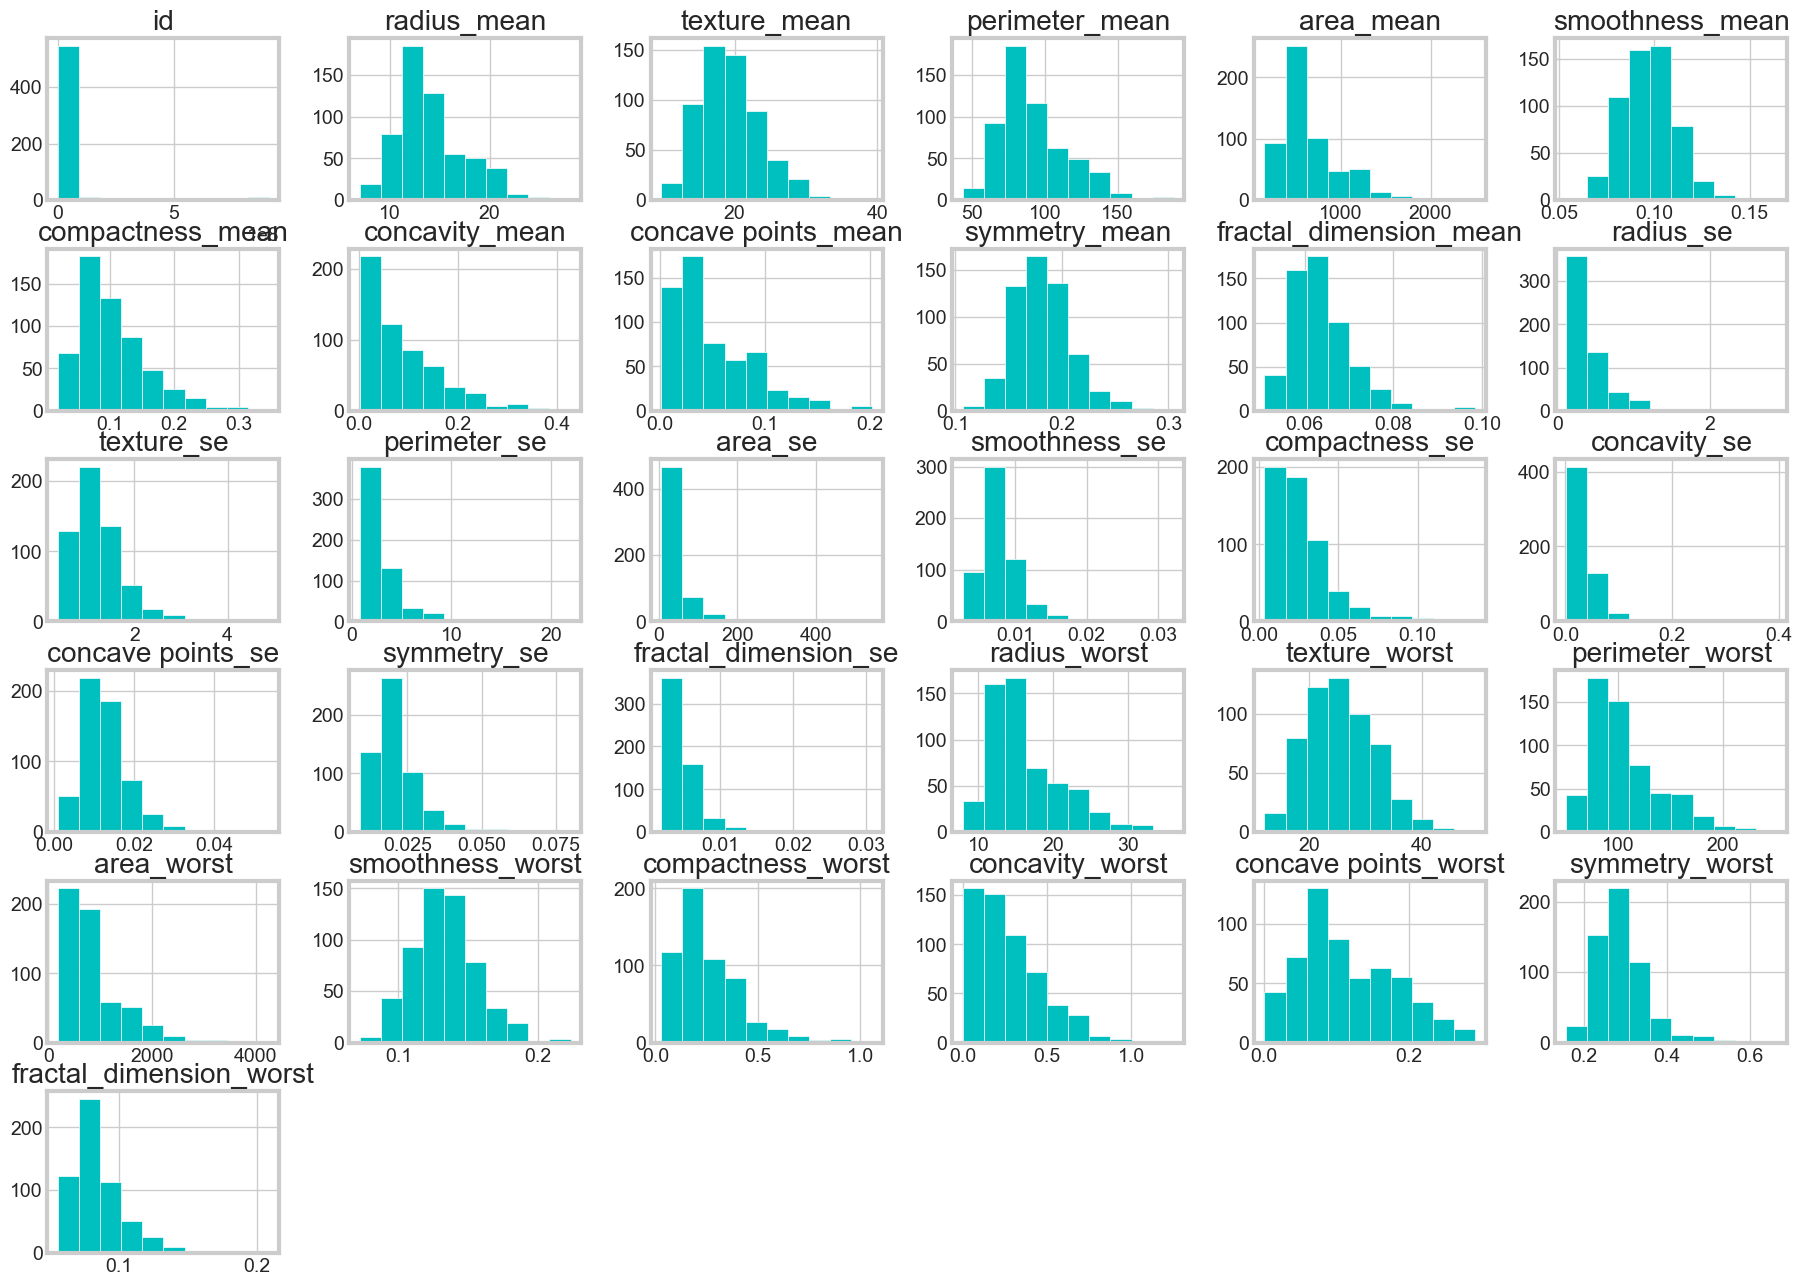

In [35]:
(X+0.001).hist(figsize=(20, 15), color = 'c');



### Train Model using different variations of NB

In [36]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
model = GaussianNB()
start_time_GNB = timer(None)
model.fit(X_train,y_train)

GaussianNB()

In [37]:
pred_trainG = model.predict(X_train)
pred_testG = model.predict(X_test)

In [38]:
model = BernoulliNB()
start_time_BNB = timer(None)
model.fit(X_train,y_train)

BernoulliNB()

In [39]:
pred_trainB = model.predict(X_train)
pred_testB = model.predict(X_test)

In [40]:
X_test_m = scaler.fit_transform(X_test)
X_train_m = scaler.fit_transform(X_train)

In [41]:
model = MultinomialNB()
start_time_MNB = timer(None)
model.fit(X_train_m,y_train)

MultinomialNB()

In [42]:
pred_trainM = model.predict(X_train_m)
pred_testM = model.predict(X_test_m)

In [43]:
from sklearn.metrics import accuracy_score
timer(start_time_GNB)
print("accuracy on train of GaussianNB",accuracy_score(y_train,pred_trainG))
print("accuracy on test of GaussianNB",accuracy_score(y_test,pred_testG))


 Time taken: 0 hours 0 min and 0.12 sec.
accuracy on train of GaussianNB 0.9422110552763819
accuracy on test of GaussianNB 0.935672514619883


In [44]:
timer(start_time_BNB)
print("accuracy on train of BernoulliNB",accuracy_score(y_train,pred_trainB))
print("accuracy on test of BernoulliNB",accuracy_score(y_test,pred_testB))


 Time taken: 0 hours 0 min and 0.09 sec.
accuracy on train of BernoulliNB 0.907035175879397
accuracy on test of BernoulliNB 0.9298245614035088


In [45]:
timer(start_time_MNB)
print("accuracy on train of MultinomialNB",accuracy_score(y_train,pred_trainM))
print("accuracy on test of MultinomialNB",accuracy_score(y_test,pred_testM))


 Time taken: 0 hours 0 min and 0.06 sec.
accuracy on train of MultinomialNB 0.8442211055276382
accuracy on test of MultinomialNB 0.847953216374269


## SVM

In [46]:
from sklearn.svm import SVC
models={
    SVC(C=0.1,gamma=0.1,kernel='rbf'),
    SVC(C=1,gamma=0.001,kernel='linear'),
    SVC(C=100,gamma=0.01,kernel='poly')
}


In [47]:
CV = 5

cv_df_train = pd.DataFrame(index=range(CV*len(models)))
entries_train = []

In [48]:
from datetime import datetime as dtime


In [49]:
for model in models:
    model_name = model.__class__.__name__
    a=dtime.now()
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = CV)
    recall = np.mean(cross_val_score(model, X_train, y_train, scoring='recall', cv = CV))
    F1 = np.mean(cross_val_score(model, X_train, y_train, scoring='f1', cv = CV))
    precision = np.mean(cross_val_score(model, X_train, y_train, scoring='precision', cv = CV))
    b=dtime.now()
    running_secs =np.abs((b.microsecond-a.microsecond)/1000)
    for fold_idx, accuracy in enumerate(accuracies,start=0):
        entries_train.append((model_name, fold_idx, accuracy,recall,F1,precision,running_secs))

In [50]:
cv_df_train = pd.DataFrame(entries_train, 
                           columns=['model_name', 'fold_idx', 'accuracy','recall','f1','precision','training_time_in_milliseconds'])

In [51]:
cv_df_train_mean_accuracy = cv_df_train.groupby('model_name').accuracy.mean()
cv_df_train_mean_accuracy

model_name
SVC    0.935443
Name: accuracy, dtype: float64

In [52]:
cv_df_train


model_name  fold_idx  accuracy  recall  f1  precision  \
0         SVC         0  0.925000     NaN NaN        NaN   
1         SVC         1  0.950000     NaN NaN        NaN   
2         SVC         2  0.937500     NaN NaN        NaN   
3         SVC         3  0.949367     NaN NaN        NaN   
4         SVC         4  0.898734     NaN NaN        NaN   
5         SVC         0  0.975000     NaN NaN        NaN   
6         SVC         1  0.937500     NaN NaN        NaN   
7         SVC         2  0.987500     NaN NaN        NaN   
8         SVC         3  0.974684     NaN NaN        NaN   
9         SVC         4  0.936709     NaN NaN        NaN   
10        SVC         0  0.912500     NaN NaN        NaN   
11        SVC         1  0.937500     NaN NaN        NaN   
12        SVC         2  0.937500     NaN NaN        NaN   
13        SVC         3  0.924051     NaN NaN        NaN   
14        SVC         4  0.848101     NaN NaN        NaN   

    training_time_in_milliseconds  
0                         166.587  
1                         166.587  
2                         166.587  
3                         166.587  
4                         166.587  
5                         930.795  
6                         930.795  
7                         930.795  
8                         930.795  
9                         930.795  
10                         71.828  
11                         71.828  
12                         71.828  
13                         71.828  
14                         71.828

### PARAMETER TUNING

In [53]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [54]:
grid= GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [55]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [56]:
grid.best_score_

0.9722784810126581

In [57]:
g_pred = grid.predict(X_test)

In [58]:
g_acc = accuracy_score(y_test,g_pred)
print("Accuracy with GridSearch:",g_acc)

Accuracy with GridSearch: 0.9824561403508771


## Plot confusion Matrix for the final model selected

Confusion matrix, without normalization
[[105   3]
 [ 11  52]]
Normalized confusion matrix
[[0.97 0.03]
 [0.17 0.83]]


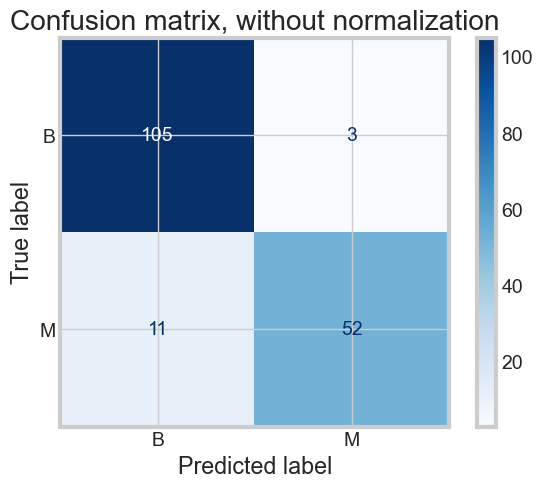

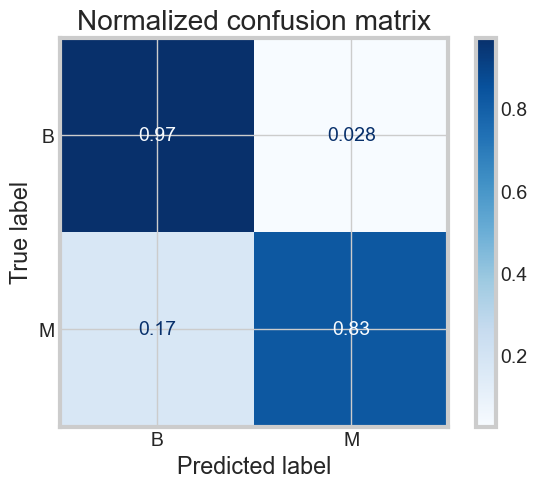

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve


classifier = SVC(C=100,gamma=0.01,kernel='poly')
classifier.fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



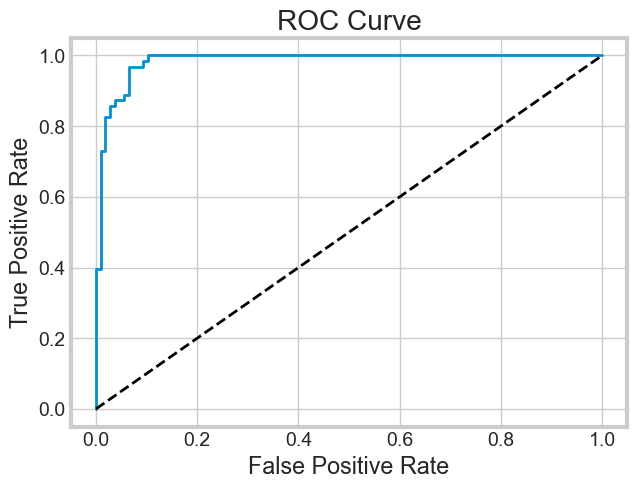

In [60]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

y_test.replace(to_replace = dict(M = 1, B = 0), inplace = True)

y_score = classifier.decision_function(X_test)

fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()